## Identifying Pneumonia in Pediatric Chest X-Ray Images using ML 
**`Author:`** **`Benjamin Brock`**  

### Using:

**`TensorFlow`** **`CNN's`** **`Binary CrossEntropy Classification`** 


**Data set can be found here:**  [Kaggle Page](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?resource=download)

---
## Description:

Using 5,863 Chest X-Ray images from pediatric patients, aging between 1 -5 years old, (provided by the Guangzhou Women and Children's Medical Center) the goal of this project is to identify the likelihood of Pneumonia being present within a patient based on their X-ray images.

The Images have been provided via 4 directories:

- Train Normal
- Train Pneumonia 
- Test Normal 
- Test Pneumonia 




In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras as keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.layers import Rescaling

In [ ]:
img = cv2.imread('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

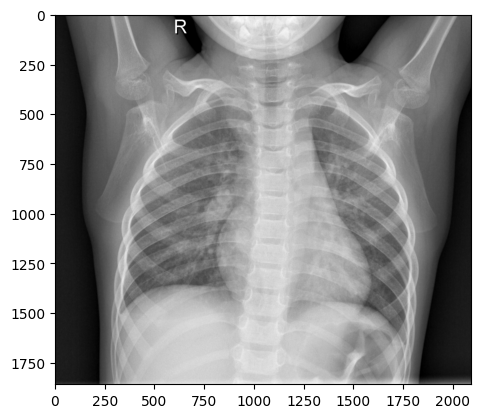

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(1858, 2090, 3)

In [ ]:
Train_Dir = '/content/chest_xray/train'
Test_Dir = '/content/chest_xray/test'
Val_Dir = '/content/chest_xray/val'

In [ ]:
TRAIN = keras.preprocessing.image_dataset_from_directory(
    Train_Dir,
    color_mode='grayscale',
    image_size=(200, 200),
    batch_size=32,
)

TEST = keras.preprocessing.image_dataset_from_directory(
    Test_Dir,
    color_mode='grayscale',
    image_size=(200, 200),
    batch_size=32,
)

VAL = keras.preprocessing.image_dataset_from_directory(
    Val_Dir,
    color_mode='grayscale',
    image_size=(200, 200),
    batch_size=32,
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [ ]:
Model = tf.keras.Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(248, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid'),
])

In [ ]:
Model.compile(
    optimizer='adam',
    loss = tf.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
Model.fit(
    TRAIN,
    epochs = 5
)

Epoch 1/5
163/163 [==============================] - 681s 4s/step - loss: 0.2937 - accuracy: 0.8717
Epoch 2/5
163/163 [==============================] - 680s 4s/step - loss: 0.1171 - accuracy: 0.9586
Epoch 3/5
163/163 [==============================] - 680s 4s/step - loss: 0.0891 - accuracy: 0.9663
Epoch 4/5
163/163 [==============================] - 678s 4s/step - loss: 0.0819 - accuracy: 0.9705
Epoch 5/5
163/163 [==============================] - 678s 4s/step - loss: 0.0657 - accuracy: 0.9799


In [ ]:
Model.evaluate(TEST)

20/20 [==============================] - 24s 1s/step - loss: 1.2647 - accuracy: 0.7564


[1.264727234840393, 0.7564102411270142]